In [1]:
#importing the dependencies
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the provided path
file_path = "/Users/faisaldernawi/Desktop/Training_And_Development/GW_Bootcamp/Homework/Project_1/Files/house_price_prediction_dataset.csv"
origin_data = pd.read_csv(file_path)

In [3]:
# Displaying the unfiltered first 5 rows of data
origin_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
# Showign the last 5 rows of data
origin_data.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [5]:
# Describing the shape of the data by indicating the number of rows and columns (rows , columns)
origin_data.shape

(2000, 10)

In [6]:
# Fetching first 20 rows
origin_data.head(20)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [7]:
# Checking for any duplicate values
origin_data.duplicated().sum()

np.int64(0)

In [8]:
# Finding the datatype
origin_data.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [9]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
# Checking to see if we have any null values within the dataset
origin_data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [11]:
# Creation of single level variables
# ----------------------

In [12]:
# finding the average price depending on the location (analysis),rounding to two decimal
location_price = origin_data.groupby("Location")["Price"].mean().round(2)
print(location_price)

Location
Downtown    536059.66
Rural       538613.94
Suburban    557416.33
Urban       518963.55
Name: Price, dtype: float64


In [13]:
 # finding the average priceof the house by condition(excellent,good ,poor)
condition_price = origin_data.groupby("Condition")["Price"].mean().round(2)
print(condition_price)

Condition
Excellent    530812.01
Fair         560594.14
Good         529002.35
Poor         528933.22
Name: Price, dtype: float64


In [14]:
# analysing the price of house based on number of bedrooms
bedroom_price = origin_data.groupby("Bedrooms")["Price"].mean().round(1)
print(bedroom_price)

Bedrooms
1    530561.6
2    545546.5
3    546977.9
4    533696.9
5    532500.1
Name: Price, dtype: float64


In [15]:
#creation of variable to show the median price based on the year built
yearbuilt_median_price = origin_data.groupby('YearBuilt')['Price'].median()
print(yearbuilt_median_price)

YearBuilt
1900    493795.5
1901    610085.0
1902    559565.5
1903    298089.0
1904    716217.0
          ...   
2019    609099.5
2020    532055.0
2021    440890.5
2022    499862.5
2023    687835.5
Name: Price, Length: 124, dtype: float64


In [16]:
# create a new column for the age of the house:(addinf a new columns name age_of_house)
house_age = origin_data["Age_of_House"]= 2024-origin_data["YearBuilt"]
print(house_age)

0        54
1        66
2        86
3       122
4        49
       ... 
1995    101
1996      5
1997    121
1998     88
1999    121
Name: YearBuilt, Length: 2000, dtype: int64


In [17]:
# New Variable created testing the floor area average
floors_avg_area = origin_data.groupby('Floors')['Area'].mean()
print(floors_avg_area)

Floors
1    2748.756430
2    2804.050651
3    2805.388889
Name: Area, dtype: float64


In [18]:
# New variable to determine price by number of bathrooms present in house
bathrooms_min_price = origin_data.groupby('Bathrooms')['Price'].min()
print(bathrooms_min_price)

Bathrooms
1    51082
2    50005
3    53657
4    51845
Name: Price, dtype: int64


In [19]:
# Location conditions relative to the average price
location_condition_avg_price = origin_data.groupby(['Location', 'Condition'])['Price'].mean()
print(location_condition_avg_price)

Location  Condition
Downtown  Excellent    524477.967320
          Fair         584624.766423
          Good         510704.191176
          Poor         525203.022727
Rural     Excellent    547966.141667
          Fair         579754.727273
          Good         500956.690000
          Poor         515768.680328
Suburban  Excellent    553103.377049
          Fair         562783.795276
          Good         570986.252252
          Poor         543906.186992
Urban     Excellent    497976.370690
          Fair         511798.304000
          Good         534554.131579
          Poor         530908.484615
Name: Price, dtype: float64


In [20]:
# the price of a hosue relative to the factor garage
garage_max_price = origin_data.groupby('Garage')['Price'].max()
print(garage_max_price)

Garage
No     999656
Yes    999453
Name: Price, dtype: int64


In [21]:
# Location count based on ID
location_count = origin_data.groupby('Location')['Id'].count()
print(location_count)

Location
Downtown    558
Rural       474
Suburban    483
Urban       485
Name: Id, dtype: int64


In [22]:
# Total price by area
total_price_by_area = origin_data.groupby('Area')['Price'].sum()
print(total_price_by_area)

Area
501     1026822
502      184962
503      850118
504      169574
505      727823
         ...   
4994    1545300
4995     286028
4996    1153917
4997     286887
4999     139460
Name: Price, Length: 1622, dtype: int64


In [23]:
# Data grouped by area
total_houses_by_area = origin_data.groupby('Area')['Id'].count()
print(total_houses_by_area)

Area
501     2
502     1
503     1
504     1
505     1
       ..
4994    3
4995    1
4996    2
4997    1
4999    1
Name: Id, Length: 1622, dtype: int64


In [24]:
# multi-level variables
# -----------------------

In [25]:
# creation of variable showing the percentage of total houses in each location
total_houses = location_count.sum()
location_percentage = (location_count / total_houses) * 100
print("Percentage of houses in each location:")
print(location_percentage)

Percentage of houses in each location:
Location
Downtown    27.90
Rural       23.70
Suburban    24.15
Urban       24.25
Name: Id, dtype: float64


In [26]:
#calculating the price per house by area (relative to the number of houses in an area
price_per_house_by_area = total_price_by_area / total_houses_by_area
print(price_per_house_by_area)

Area
501     513411.0
502     184962.0
503     850118.0
504     169574.0
505     727823.0
          ...   
4994    515100.0
4995    286028.0
4996    576958.5
4997    286887.0
4999    139460.0
Length: 1622, dtype: float64


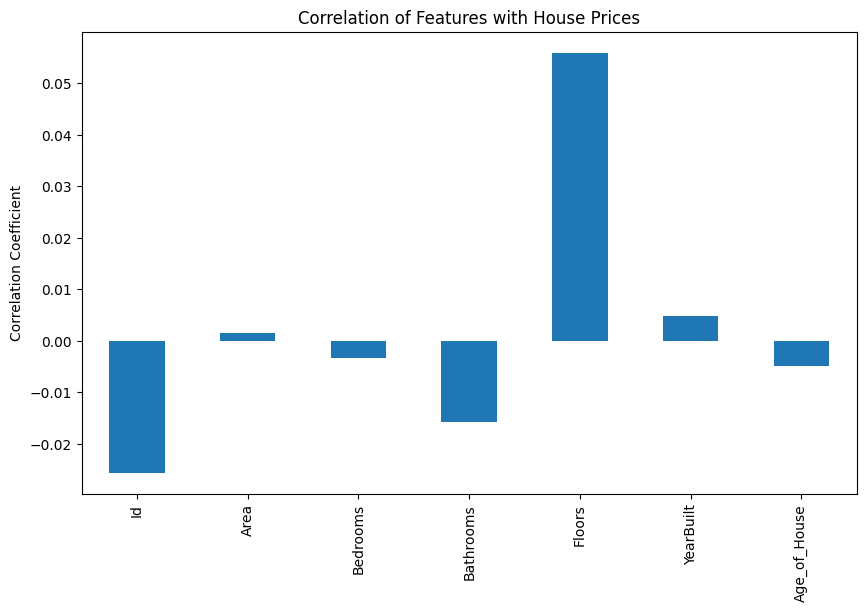

In [31]:
# Creating a correlation matrix to identify relationships within data
# Exclude non-numeric columns from dataframe
numeric_data = origin_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix only on numeric data
correlation = numeric_data.corr()

# Bar plot of correlation with Price
correlation['Price'].drop('Price').plot(kind='bar', figsize=(10, 6))
plt.title('Correlation of Features with House Prices')
plt.ylabel('Correlation Coefficient')
plt.show()

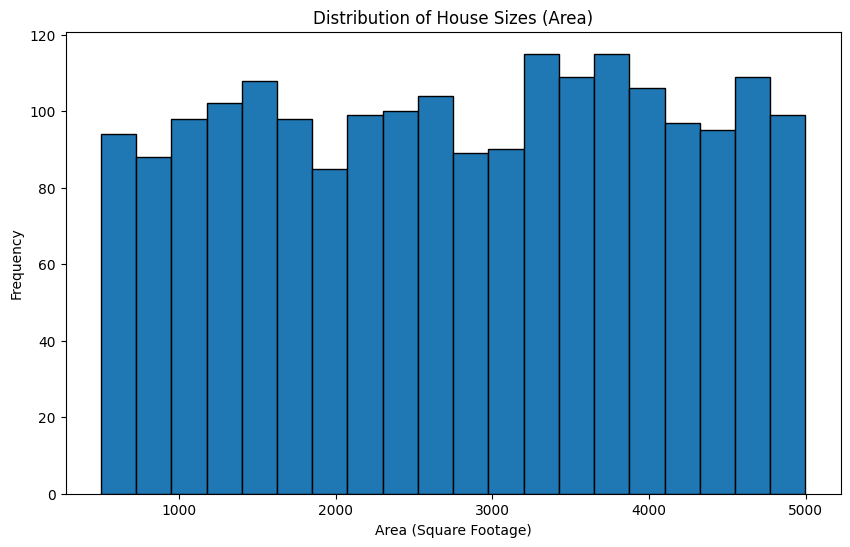

In [32]:
# Histogram of house sizes (Area)
origin_data['Area'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of House Sizes (Area)')
plt.xlabel('Area (Square Footage)')
plt.ylabel('Frequency')
plt.show()

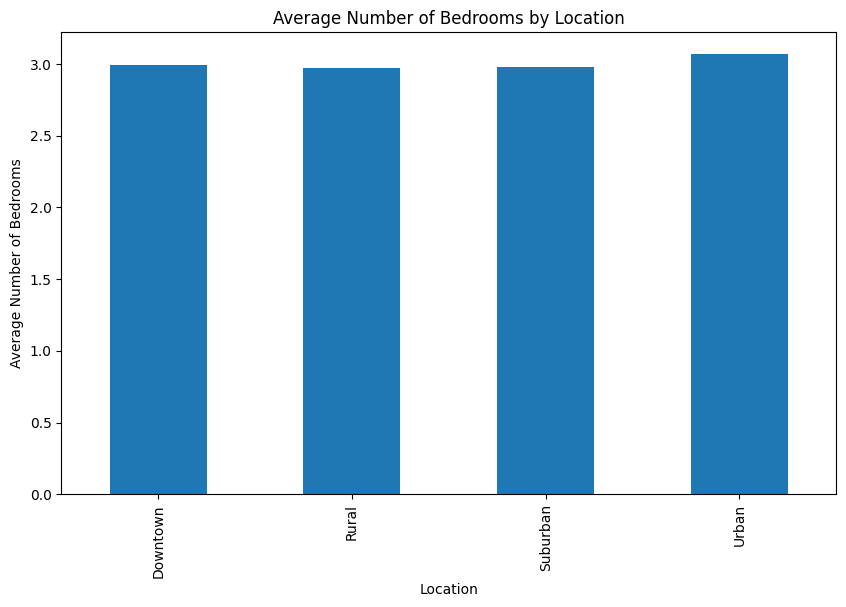

In [33]:
# Bar plot of average number of bedrooms by location
bedrooms_by_location = origin_data.groupby('Location')['Bedrooms'].mean()
bedrooms_by_location.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Bedrooms by Location')
plt.ylabel('Average Number of Bedrooms')
plt.show()

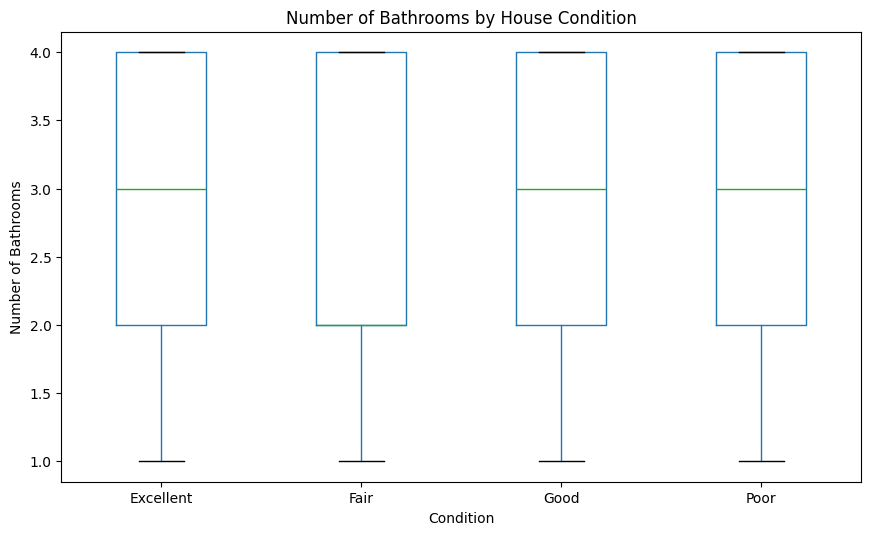

In [38]:
# Boxplot of number of bathrooms by house condition
origin_data.boxplot(column='Bathrooms', by='Condition', grid=False, figsize=(10, 6))
plt.title('Number of Bathrooms by House Condition')
plt.suptitle('')
plt.ylabel('Number of Bathrooms')
plt.show()

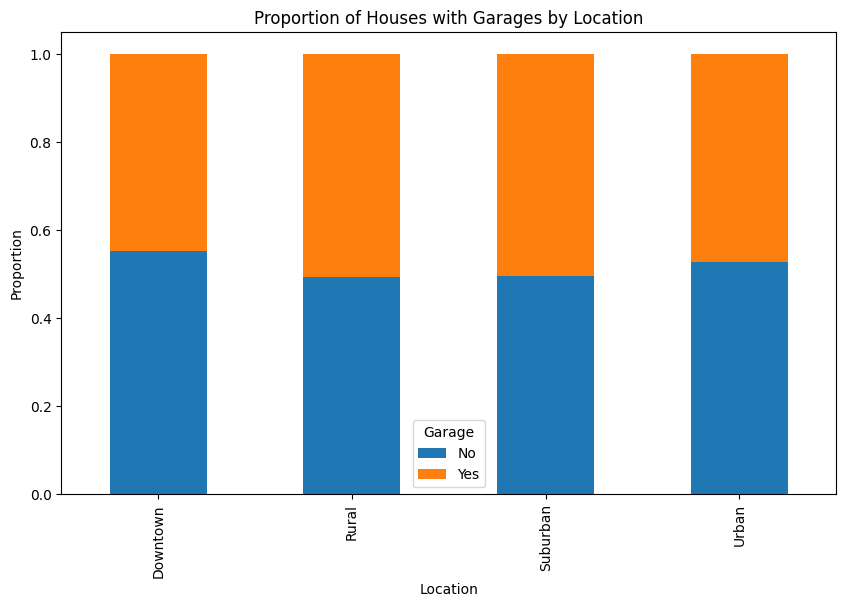

In [39]:
# Bar plot of garage presence by location
garage_by_location = origin_data.groupby('Location')['Garage'].value_counts(normalize=True).unstack()
garage_by_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Houses with Garages by Location')
plt.ylabel('Proportion')
plt.show()

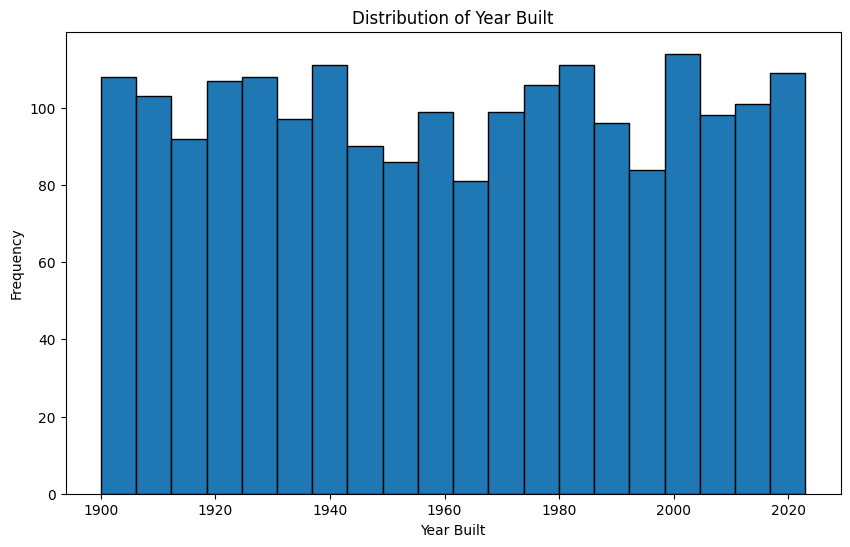

In [40]:
# Histogram of year built
origin_data['YearBuilt'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

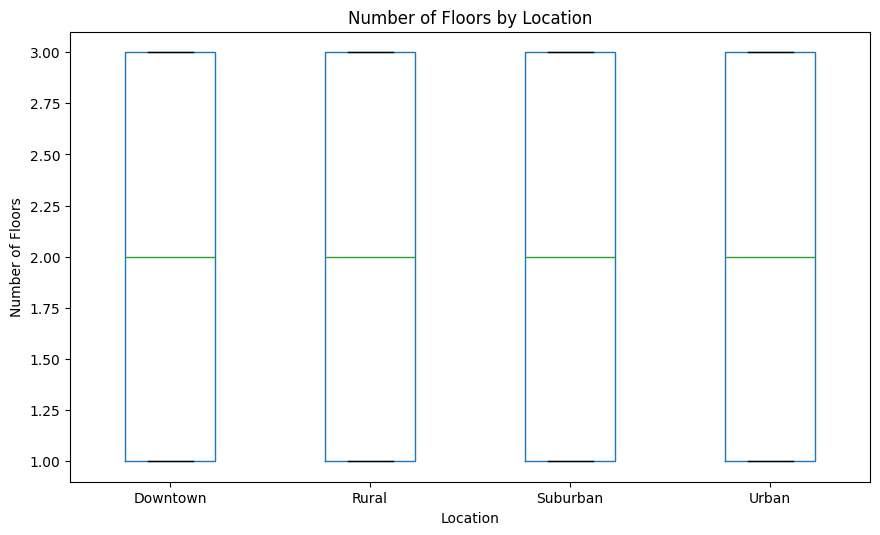

In [41]:
# Boxplot of number of floors by location
origin_data.boxplot(column='Floors', by='Location', grid=False, figsize=(10, 6))
plt.title('Number of Floors by Location')
plt.suptitle('')
plt.ylabel('Number of Floors')
plt.show()

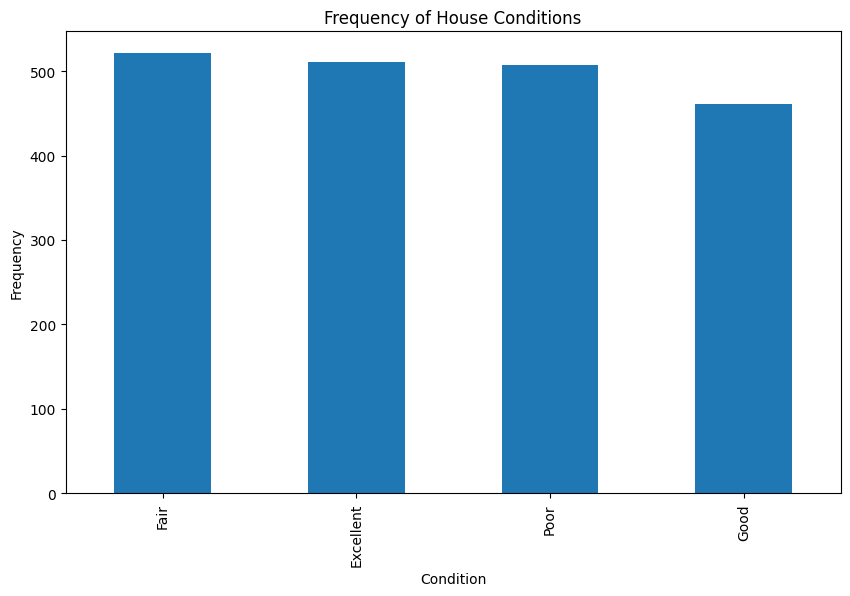

In [42]:
# Bar plot of house condition frequency
origin_data['Condition'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of House Conditions')
plt.ylabel('Frequency')
plt.xlabel('Condition')
plt.show()